## Importing Library

In [54]:
# prediction
def check_correct(predict, y):
    result = {}
    result['cancer-correct'] = 0
    result['cancer-wrong'] = 0
    result['normal-correct'] = 0
    result['normal-wrong'] = 0

    for i in range(len(predict)) :
        if predict[i] == y[i] :
            if y[i] == 0 :
                result['normal-correct'] += 1
            else :
                result['cancer-correct'] += 1
        else :
            if y[i] == 0 :
                result['normal-wrong'] += 1
            else :
                result['cancer-wrong'] += 1

    for result_k, result_v in result.items():
        print(result_k +" : "+ str(result_v))
    sensitivity=result['cancer-correct']/(result['cancer-correct']+result['cancer-wrong'])
    specificity=result['normal-correct']/(result['normal-correct']+result['normal-wrong'])
    print("Sensitivity :", sensitivity)
    print("Specificity :", specificity)
    return sensitivity, specificity

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential 
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10)

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

1.5.0


## Import Data

In [55]:
path = "C://test/TC_intersect_subsamples/"
types = ["inter_OV_Var_200", "inter_OV_Annotation3000_100", 
         "inter_OV_CV_400", "inter_OV_new_Diff_400",
         "inter_OV_Clin", 
         "inter_OV_SNV_ch" 
         ]
nodes = [[150, 150, 150, 150],
         [150, 200, 200, 150],
         [150, 200, 300, 400],
         [200, 200, 200],
         [150, 200, 250],
         [200, 200, 200]
        ]
batches = [10,5,10,10,5,5]
rates = [0.0005, 0.001, 0.001, 0.001, 0.01, 0.01]

file_1 = path+types[2]+".csv"
file_2 = path+types[4]+".csv"
file_3 = path+types[5]+".csv"
batch_1, batch_2, batch_3 = batches[0], batches[1], batches[2]
node_1, node_2, node_3 = nodes[0],nodes[1],nodes[2]
rate_1, rate_2, rate_3 = rates[0],rates[1],rates[2]


'''
file_4 = path+types[3]+".csv"
file_5 = path+types[4]+".csv"
file_6 = path+types[5]+".csv"
'''

idx_col = 0

data_1 = pd.read_csv(file_1,index_col=idx_col)
data_2 = pd.read_csv(file_2,index_col=idx_col)
data_3 = pd.read_csv(file_3,index_col=idx_col)
'''
data_4 = pd.read_csv(file_4,index_col=idx_col)
data_5 = pd.read_csv(file_5,index_col=idx_col)
data_6 = pd.read_csv(file_6,index_col=idx_col)
'''

sample_1,features_1 = data_1.shape
sample_2,features_2 = data_2.shape
sample_3,features_3 = data_3.shape
'''
sample_4,features_4 = data_4.shape
sample_5,features_5 = data_5.shape
sample_6,features_6 = data_6.shape
'''

print("[1] file_name: ", file_1, "\nsample : {}  \nfeatures : {}".format(sample_1,features_1))
print("[2] file_name: ", file_2, "\nsample : {}  \nfeatures : {}".format(sample_2,features_2))
print("[3] file_name: ", file_3, "\nsample : {}  \nfeatures : {}".format(sample_3,features_3))
'''
print("[4] file_name: ", file_4, "\nsample : {}  \nfeatures : {}".format(sample_4,features_4))
print("[5] file_name: ", file_5, "\nsample : {}  \nfeatures : {}".format(sample_5,features_5))
print("[6] file_name: ", file_6, "\nsample : {}  \nfeatures : {}".format(sample_6,features_6))
'''

[1] file_name:  C://test/TC_intersect_subsamples/inter_OV_CV_400.csv 
sample : 196  
features : 402
[2] file_name:  C://test/TC_intersect_subsamples/inter_OV_Clin.csv 
sample : 196  
features : 37
[3] file_name:  C://test/TC_intersect_subsamples/inter_OV_SNV_ch.csv 
sample : 196  
features : 284


'\nprint("[4] file_name: ", file_4, "\nsample : {}  \nfeatures : {}".format(sample_4,features_4))\nprint("[5] file_name: ", file_5, "\nsample : {}  \nfeatures : {}".format(sample_5,features_5))\nprint("[6] file_name: ", file_6, "\nsample : {}  \nfeatures : {}".format(sample_6,features_6))\n'

## Split Train Test Data

In [56]:
train_data_1,test_data_1 = train_test_split(data_1, test_size=0.2)
y_val_1 = train_data_1.Platinum_Status
x_val_1 = train_data_1.drop(["Platinum_Status","index"],axis=1)
test_y_val_1 = test_data_1.Platinum_Status
test_x_val_1 = test_data_1.drop(["Platinum_Status","index"],axis=1)

train_data_2,test_data_2 = train_test_split(data_2, test_size=0.2)
y_val_2 = train_data_2.Platinum_Status
x_val_2 = train_data_2.drop(["Platinum_Status","index"],axis=1)
test_y_val_2 = test_data_2.Platinum_Status
test_x_val_2 = test_data_2.drop(["Platinum_Status","index"],axis=1)

train_data_3,test_data_3 = train_test_split(data_3, test_size=0.2)
y_val_3 = train_data_3.Platinum_Status
x_val_3 = train_data_3.drop(["Platinum_Status","index"],axis=1)
test_y_val_3 = test_data_3.Platinum_Status
test_x_val_3 = test_data_3.drop(["Platinum_Status","index"],axis=1)

'''
train_data_4,test_data_4 = train_test_split(data_4, test_size=0.2)
y_val_4 = train_data_4.Platinum_Status
x_val_4 = train_data_4.drop(["Platinum_Status","index"],axis=1)
test_y_val_4 = test_data_4.Platinum_Status
test_x_val_4 = test_data_4.drop(["Platinum_Status","index"],axis=1)

train_data_5,test_data_5 = train_test_split(data_5, test_size=0.2)
y_val_5 = train_data_5.Platinum_Status
x_val_5 = train_data_5.drop(["Platinum_Status","index"],axis=1)
test_y_val_5 = test_data_5.Platinum_Status
test_x_val_5 = test_data_5.drop(["Platinum_Status","index"],axis=1)

train_data_6,test_data_6 = train_test_split(data_6, test_size=0.2)
y_val_6 = train_data_6.Platinum_Status
x_val_6 = train_data_6.drop(["Platinum_Status","index"],axis=1)
test_y_val_6 = test_data_6.Platinum_Status
test_x_val_6 = test_data_6.drop(["Platinum_Status","index"],axis=1)
'''

'\ntrain_data_4,test_data_4 = train_test_split(data_4, test_size=0.2)\ny_val_4 = train_data_4.Platinum_Status\nx_val_4 = train_data_4.drop(["Platinum_Status","index"],axis=1)\ntest_y_val_4 = test_data_4.Platinum_Status\ntest_x_val_4 = test_data_4.drop(["Platinum_Status","index"],axis=1)\n\ntrain_data_5,test_data_5 = train_test_split(data_5, test_size=0.2)\ny_val_5 = train_data_5.Platinum_Status\nx_val_5 = train_data_5.drop(["Platinum_Status","index"],axis=1)\ntest_y_val_5 = test_data_5.Platinum_Status\ntest_x_val_5 = test_data_5.drop(["Platinum_Status","index"],axis=1)\n\ntrain_data_6,test_data_6 = train_test_split(data_6, test_size=0.2)\ny_val_6 = train_data_6.Platinum_Status\nx_val_6 = train_data_6.drop(["Platinum_Status","index"],axis=1)\ntest_y_val_6 = test_data_6.Platinum_Status\ntest_x_val_6 = test_data_6.drop(["Platinum_Status","index"],axis=1)\n'

## Modeling Seperate Model

###  Building seperate model for ensemble(model 1, 2, 3)

In [57]:
print(features_1, features_2, features_3)

402 37 284


In [84]:
from keras.layers import Input, Dense
from keras.models import Model

'''
m1 = Sequential()
m1.add(Dense(features_1-2, input_dim = sample_1 * (features_1-2), activation='relu', init='glorot_uniform'))
m1.add(Dropout(0.5))
m1.add(Dense(150, activation='relu'))
m1.add(Dropout(0.5))
m1.add(Dense(200, activation='relu'))
m1.add(Dropout(0.5))
m1.add(Dense(300, activation='relu'))
m1.add(Dropout(0.5))
m1.add(Dense(150, activation='relu'))
m1.add(Dropout(0.5))
m1.add(Dense(1, activation='sigmoid'))
'''
keep_prob = 0.5

input_m1 = Input(shape=(features_1-2,))
input_drop_m1 = Dropout(keep_prob)(input_m1)
h1_m1 = Dense(150,activation='relu')(input_drop_m1)
h1_m1 = Dropout(keep_prob)(h1_m1)
h2_m1 = Dense(200,activation='relu')(h1_m1)
h2_m1 = Dropout(keep_prob)(h2_m1)
h3_m1 = Dense(300,activation='relu')(h2_m1) 
h3_m1 = Dropout(keep_prob)(h3_m1)
h4_m1 = Dense(150,activation='relu')(h3_m1) 
h4_m1 = Dropout(keep_prob)(h4_m1)
output_m1 = Dense(1,activation="sigmoid")(h4_m1) 
model1 = Model(inputs=input_m1,outputs=output_m1)

input_m2 = Input(shape=(features_2-2,))
input_drop_m2 = Dropout(keep_prob)(input_m2)
h1_m2 = Dense(150,activation='relu')(input_drop_m2)
h1_m2 = Dropout(keep_prob)(h1_m2)
h2_m2 = Dense(200,activation='relu')(h1_m2)
h2_m2 = Dropout(keep_prob)(h2_m2)
h3_m2 = Dense(250,activation='relu')(h2_m2)
h3_m2 = Dropout(keep_prob)(h3_m2)
#h4_m2 = Dense(10,activation='relu')(h3_m2)
h4_m2 = h3_m2
#h4_m2 = Dropout(keep_prob)(h4_m2)
output_m2 = Dense(1,activation="sigmoid")(h4_m2)
model2 = Model(inputs=input_m2,outputs=output_m2)

input_m3 = Input(shape=(features_3-2,))
input_drop_m3 = Dropout(keep_prob)(input_m3)
h1_m3 = Dense(200,activation='relu')(input_drop_m3)
h1_m3 = Dropout(keep_prob)(h1_m3)
h2_m3 = Dense(200,activation='relu')(h1_m3)
h2_m3 = Dropout(keep_prob)(h2_m3)
h3_m3 = Dense(200,activation='relu')(h2_m3)
h3_m3 = Dropout(keep_prob)(h3_m3)
h4_m3 = h3_m3
output_m3 = Dense(1,activation="sigmoid")(h4_m3)
model3 = Model(inputs=input_m3,outputs=output_m3)

'''
input_m4 = Input(shape=(features_4-2,))
h1_m4 = Dense(150,activation='relu')(input_m4)
h2_m4 = Dense(200,activation='relu')(h1_m4) 
h3_m4 = Dense(200,activation='relu')(h2_m4) 
h4_m4 = Dense(150,activation='relu')(h3_m4) 
output_m4 = Dense(1,activation="sigmoid")(h4_m4) 
model4 = Model(inputs=input_m4,outputs=output_m4)

input_m5 = Input(shape=(features_5-2,))
h1_m5 = Dense(250,activation='relu')(input_m5)
h2_m5 = Dense(100,activation='relu')(h1_m5) 
h3_m5 = Dense(30,activation='relu')(h2_m5)
h4_m5 = Dense(10,activation='relu')(h3_m5) 
output_m5 = Dense(1,activation="sigmoid")(h4_m5)
model5 = Model(inputs=input_m5,outputs=output_m5)

input_m6 = Input(shape=(features_6-2,))
h1_m6 = Dense(200,activation='relu')(input_m6)
h2_m6 = Dense(100,activation='relu')(h1_m6) 
h3_m6 = Dense(100,activation='relu')(h2_m6)
h4_m6 = Dense(10,activation='relu')(h3_m6) 
output_m6 = Dense(1,activation="sigmoid")(h4_m6)
model6 = Model(inputs=input_m6,outputs=output_m6)
'''

'''m1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
model1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
model4.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model5.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model6.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
#m1.fit(x_val_1, y_val_1, epochs=13, batch_size=10)
print(early_stopping)
model1.fit(x_val_1, y_val_1, epochs=13, batch_size=10, callbacks=[early_stopping])
model2.fit(x_val_2, y_val_2, epochs=13, batch_size=5, callbacks=[early_stopping])
model3.fit(x_val_3, y_val_3, epochs=13, batch_size=5, callbacks=[early_stopping])
'''
model4.fit(x_val_4, y_val_4, epochs=13)
model5.fit(x_val_5, y_val_5, epochs=13)
model6.fit(x_val_6, y_val_6, epochs=13)
'''

Epoch 1/13
156/156 [==============================] - 4s 24ms/step - loss: 0.7322 - acc: 0.5256
Epoch 2/13
120/156 [======================>.......] - ETA: 0s - loss: 0.8169 - acc: 0.4833

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


156/156 [==============================] - 0s 1ms/step - loss: 0.7871 - acc: 0.5128
Epoch 3/13
156/156 [==============================] - 0s 1ms/step - loss: 0.6905 - acc: 0.6410
Epoch 4/13
156/156 [==============================] - 0s 2ms/step - loss: 0.7565 - acc: 0.5641
Epoch 5/13
156/156 [==============================] - 0s 2ms/step - loss: 0.6567 - acc: 0.6026
Epoch 6/13
156/156 [==============================] - 0s 2ms/step - loss: 0.7199 - acc: 0.5321
Epoch 7/13
156/156 [==============================] - 0s 1ms/step - loss: 0.7191 - acc: 0.5449
Epoch 8/13
156/156 [==============================] - 0s 2ms/step - loss: 0.7137 - acc: 0.5705
Epoch 9/13
156/156 [==============================] - 0s 2ms/step - loss: 0.6275 - acc: 0.6731
Epoch 10/13
156/156 [==============================] - 0s 2ms/step - loss: 0.7426 - acc: 0.5256
Epoch 11/13
156/156 [==============================] - 0s 1ms/step - loss: 0.6353 - acc: 0.6282
Epoch 12/13
156/156 [==============================] - 0s 2

'\nmodel4.fit(x_val_4, y_val_4, epochs=13)\nmodel5.fit(x_val_5, y_val_5, epochs=13)\nmodel6.fit(x_val_6, y_val_6, epochs=13)\n'

In [85]:
from keras.models import model_from_json

# serialize model to JSON
model1_json = model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model1_json)
# serialize weights to HDF5
model1.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


In [86]:
# later...
 
# load json and create model
json_file1 = open('model1.json', 'r')
loaded_model_json1 = json_file1.read()
json_file1.close()
loaded_model1 = model_from_json(loaded_model_json1)
# load weights into new model
loaded_model1.load_weights("model1.h5")

### Evaluating seperate model's performance

In [87]:
model1_new=loaded_model1
model1_new.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

m1_tr_loss,m1_tr_accuracy=model1.evaluate(x_val_1,y_val_1)
m2_tr_loss,m2_tr_accuracy=model2.evaluate(x_val_2,y_val_2)
m3_tr_loss,m3_tr_accuracy=model3.evaluate(x_val_3,y_val_3)

m1_loss,m1_accuracy= model1.evaluate(test_x_val_1,test_y_val_1)
m2_loss,m2_accuracy= model2.evaluate(test_x_val_2,test_y_val_2)
m3_loss,m3_accuracy= model3.evaluate(test_x_val_3,test_y_val_3)

m1_tr_loss_new,m1_tr_accuracy_new=model1_new.evaluate(x_val_1,y_val_1)
m1_loss_new,m1_accuracy_new= model1_new.evaluate(test_x_val_1,test_y_val_1)

print(file_1,file_2,file_3)
print("\nTrain Accuracy for model 1, 2, 3 : {},{},{}, {}".format(m1_tr_accuracy,m2_tr_accuracy))
print("\nTest Accuracy for model 1, 2, 3 : {},{},{}, {}".format(m1_accuracy,m2_accuracy,m3_accuracy))

40/40 [==============================] - 0s 330us/step
C://test/TC_intersect_subsamples/inter_OV_CV_400.csv C://test/TC_intersect_subsamples/inter_OV_Clin.csv C://test/TC_intersect_subsamples/inter_OV_SNV_ch.csv

Train Accuracy for model 1, 2, 3 : 0.8782051297334524,0.7628205128205128,0.8974358974358975, 0.8782051297334524

Test Accuracy for model 1, 2, 3 : 0.6,0.525,0.475, 0.6


## Modeling Ensemble model

### Building original ensemble model

In [60]:
m1_predictions = model1.predict(x_val_1)
m2_predictions = model2.predict(x_val_2)
m3_predictions = model3.predict(x_val_3)

ensemble_x_val = np.concatenate([m1_predictions, m2_predictions, m3_predictions], axis=1)

ensemble_model = keras.Sequential([
    keras.layers.Dense(3,input_shape=(3,),name="input_layer"),
    keras.layers.Dense(2,activation="relu"),        
    keras.layers.Dense(1,activation='sigmoid',name="output_layer")])

ensemble_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

ensemble_model.fit(ensemble_x_val, y_val_1, epochs=5, batch_size= 1)


Epoch 1/5
156/156 [==============================]156/156 [==============================] - 4s 26ms/step - loss: 0.7046 - acc: 0.5513

Epoch 2/5
156/156 [==============================]156/156 [==============================] - 1s 6ms/step - loss: 0.6868 - acc: 0.5577

Epoch 3/5
156/156 [==============================]156/156 [==============================] - 1s 7ms/step - loss: 0.6799 - acc: 0.5769

Epoch 4/5
156/156 [==============================]156/156 [==============================] - 1s 7ms/step - loss: 0.6776 - acc: 0.5833

Epoch 5/5
156/156 [==============================]156/156 [==============================] - 1s 6ms/step - loss: 0.6741 - acc: 0.5769



### Evaluating _DNN Combiner_ ensemble model

In [61]:
m1_test_predictions = model1.predict(test_x_val_1)
m2_test_predictions = model2.predict(test_x_val_2)
m3_test_predictions = model3.predict(test_x_val_3)

ensemble_test_x_val = np.concatenate([m1_test_predictions, m2_test_predictions, m3_test_predictions], axis=1)

em_loss,em_accuracy= ensemble_model.evaluate(ensemble_test_x_val,test_y_val_1)

print("Accuracy for DNN combiner ensemble : {}".format(em_accuracy))

40/40 [==============================]40/40 [==============================] - 2s 39ms/step

Accuracy for DNN combiner ensemble : 0.575


### Evaluating _mean_ ensemble model

In [62]:
mean_predictions=(m1_test_predictions+m2_test_predictions+m3_test_predictions)/3
labled_predictions = np.where(mean_predictions > 0.5, 1, 0).flatten()
mean_em_accuracy = sum(labled_predictions==test_y_val_1.values)/len(test_y_val_1)

print("Accuracy for mean ensemble : {}".format(mean_em_accuracy))

Accuracy for mean ensemble : 0.6


## Transferred Ensemble Modeling 

### Making new input data for t-ensemble

In [71]:
from keras.models import Model
model = Model(inputs=[input_m1], outputs=[h4_m1])
results_m1 = model.predict([x_val_1])

model = Model(inputs=[input_m2], outputs=[h4_m2])
results_m2 = model.predict([x_val_2])

model = Model(inputs=[input_m3], outputs=[h4_m3])
results_m3 = model.predict([x_val_3])

t_ensemble_x_val = np.concatenate([results_m1, results_m2, results_m3], axis=1)
print(t_ensemble_x_val.shape)

[[0.         0.         0.         ... 0.         0.         0.00368698]
 [0.         0.0352152  0.         ... 0.         0.         0.        ]
 [0.08995163 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.03741145]
 [0.         0.04493077 0.         ... 0.         0.         0.1015228 ]
 [0.         0.         0.         ... 0.         0.         0.0150783 ]]
(156, 600)


### Modeling t-ensemble  

In [64]:
t_ensemble_input = Input(shape=(t_ensemble_x_val.shape[1],))
t_ensemble_h1 = Dense(20,activation='relu')(t_ensemble_input)
t_ensemble_h2 = Dense(10,activation='relu')(t_ensemble_h1)
t_ensemble_h3 = Dense(5,activation='relu')(t_ensemble_h2)
t_ensemble_output = Dense(1,activation='sigmoid')(t_ensemble_h3)

t_ensemble_model = Model(inputs=[t_ensemble_input],outputs=[t_ensemble_output])
t_ensemble_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

t_ensemble_model.fit(t_ensemble_x_val, y_val_1, epochs=2,batch_size=5)

Epoch 1/2
156/156 [==============================] - 3s 18ms/step - loss: 0.6879 - acc: 0.5769
Epoch 2/2
156/156 [==============================] - 0s 1ms/step - loss: 0.6537 - acc: 0.6603


### Evaluating t-ensemble

In [65]:
model = Model(inputs=[input_m1], outputs=[h4_m1])
test_results_m1 = model.predict([test_x_val_1])
model = Model(inputs=[input_m2], outputs=[h4_m2])
test_results_m2 = model.predict([test_x_val_2])
model = Model(inputs=[input_m3], outputs=[h4_m3])
test_results_m3 = model.predict([test_x_val_3])

t_ensemble_test_x_val = np.concatenate([test_results_m1, test_results_m2, test_results_m3], axis=1)
t_em_accuracy = t_ensemble_model.evaluate(t_ensemble_test_x_val,test_y_val_1)[1]
print("\nAccuracy for t-ensemble: ",t_em_accuracy )

40/40 [==============================] - 1s 25ms/step

Accuracy for t-ensemble:  0.625


## Performance Comparison

In [66]:
label = ["model1","model2","model3","mean-em","d-comb em","t-em"]
accuracy = [m1_accuracy,m2_accuracy,m3_accuracy,mean_em_accuracy,em_accuracy,t_em_accuracy ]
print("model1: "+str(accuracy[0])+"\nmodel2: "+str(accuracy[1])+"\nmodel3: "+str(accuracy[2])+"\nmean-em: "+str(accuracy[3])+"\nd-comb em: "+str(accuracy[4])+"\nt-em: "+str(accuracy[5]))

model1: 0.625
model2: 0.65
model3: 0.35
mean-em: 0.6
d-comb em: 0.575
t-em: 0.625


In [67]:
def plot_bar_x():
    # this is for plotting purpose
    plt.figure(figsize=(30,20))
    axes = plt.gca()
    axes.set_ylim([min(m1_accuracy,m2_accuracy,m3_accuracy,mean_em_accuracy,em_accuracy,t_em_accuracy)-0.02,1])
    index = np.arange(len(label))
    plt.bar(index, accuracy,color=['red', 'orange', 'yellow', "green",'blue', 'purple',],alpha=0.5,width=0.3)
    plt.xlabel('Method', fontsize=35)
    plt.ylabel('Accuracy', fontsize=35)
    plt.yticks(fontsize=30)    
    plt.xticks(index, label, fontsize=30, rotation=90)
    plt.title('Performance Comparison for each Ensemble Model',fontsize=40)
    plt.show()

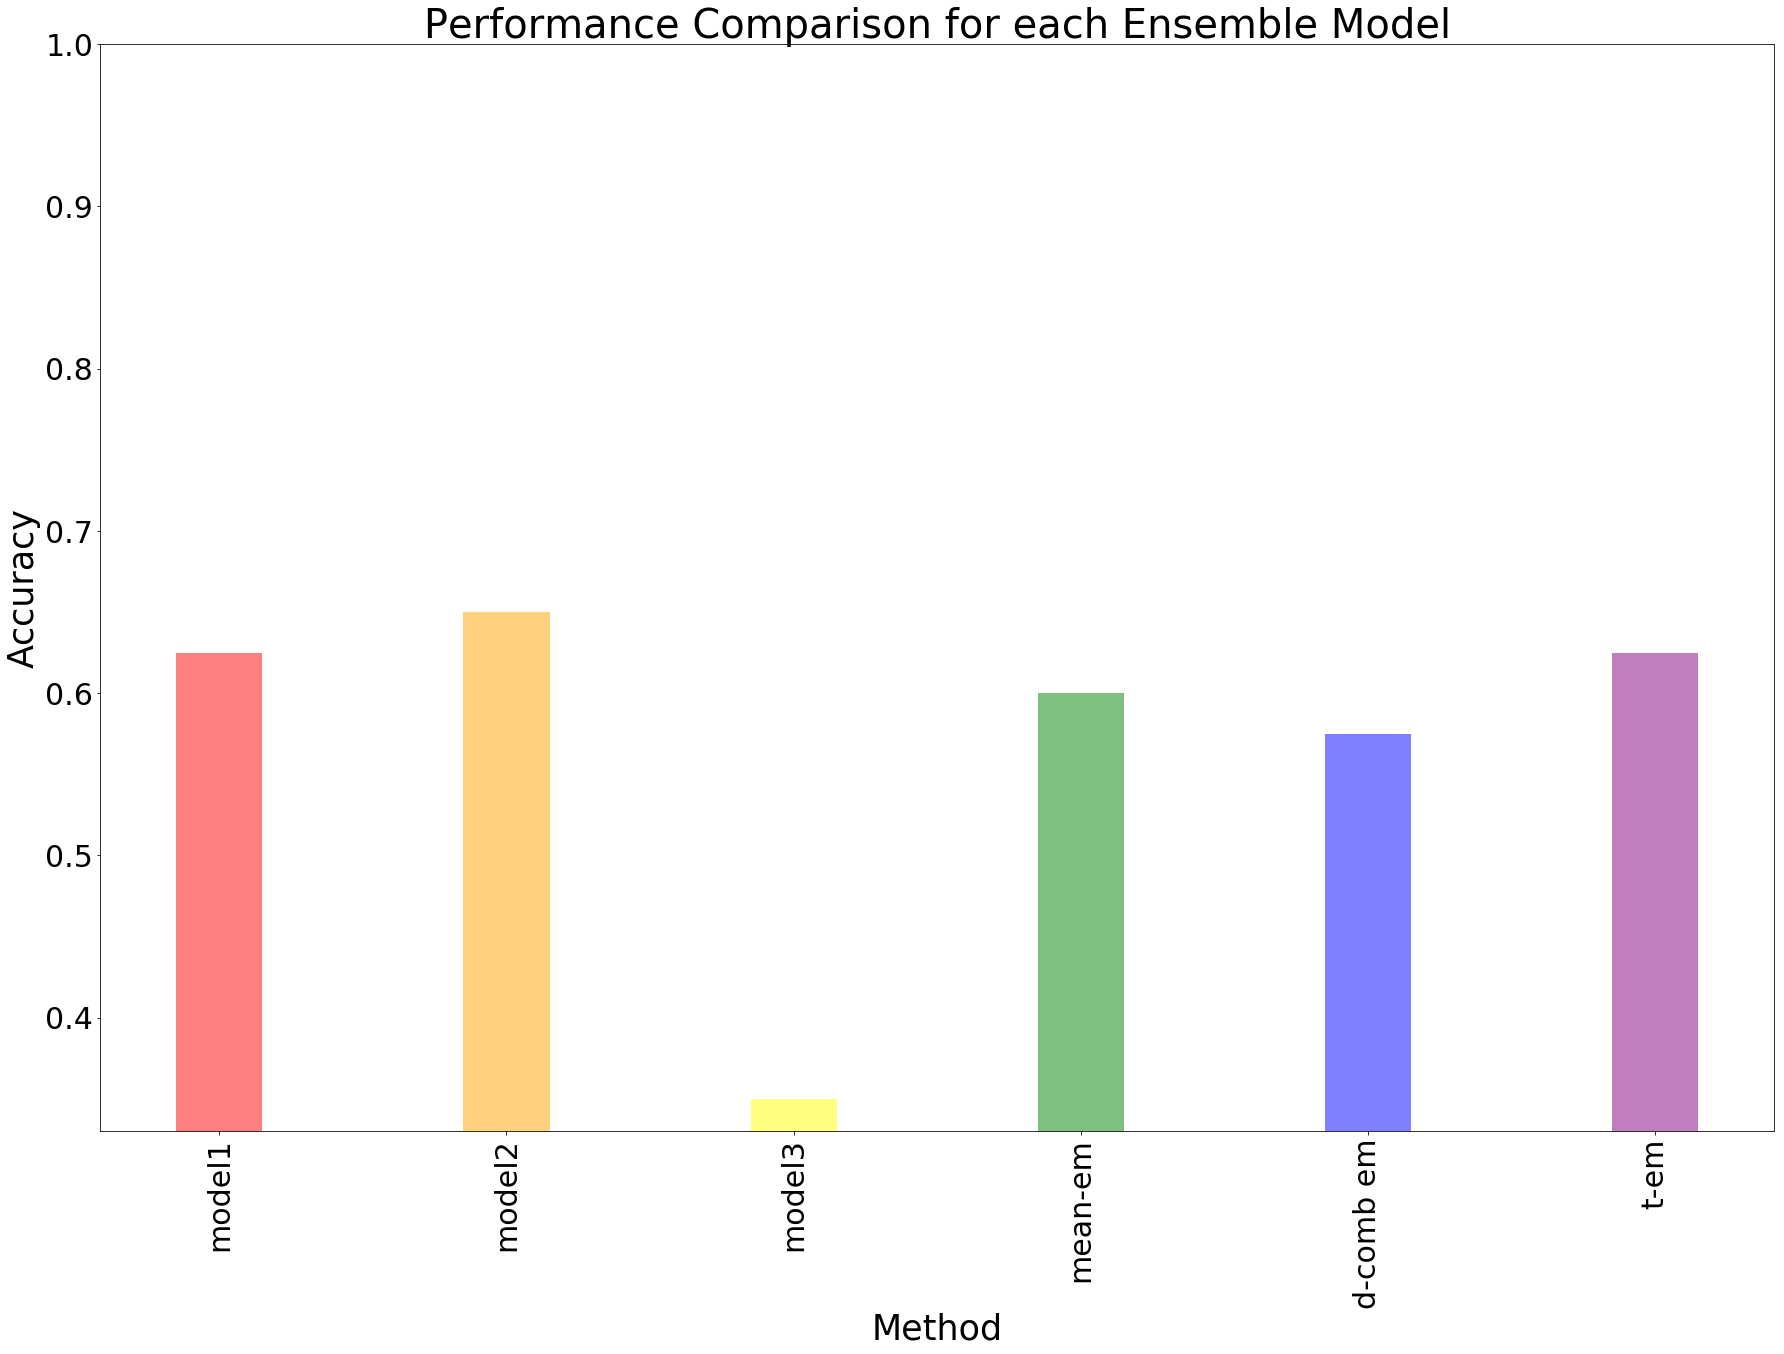

In [68]:
plot_bar_x()